In [189]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['stopwordsen', 'random-acts-of-pizza']


In [190]:
df = pd.read_json('../input/random-acts-of-pizza/train.json')
df

,giver_username_if_known,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,post_was_edited,request_id,request_number_of_comments_at_retrieval,request_text,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_account_age_in_days_at_retrieval,requester_days_since_first_post_on_raop_at_request,requester_days_since_first_post_on_raop_at_retrieval,requester_number_of_comments_at_request,requester_number_of_comments_at_retrieval,requester_number_of_comments_in_raop_at_request,requester_number_of_comments_in_raop_at_retrieval,requester_number_of_posts_at_request,requester_number_of_posts_at_retrieval,requester_number_of_posts_on_raop_at_request,requester_number_of_posts_on_raop_at_retrieval,requester_number_of_subreddits_at_request,requester_received_pizza,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_minus_downvotes_at_retrieval,requester_upvotes_plus_downvotes_at_request,requester_upvotes_plus_downvotes_at_retrieval,requester_user_flair,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc
0,N/A,0,1,0,t3_l25d7,0,Hi I am in need of food for my 4 children we a...,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.000000,792.420405,0.000000,792.420405,0,0,0,0,0,1,0,1,0,False,[],0,1,0,1,None,nickylvst,1317852607,1317849007
1,N/A,2,5,0,t3_rcb83,0,I spent the last money I had on gas today. Im ...,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.111100,1122.279838,0.000000,621.127072,0,1000,0,0,15,26,0,2,12,False,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,4258,116,11168,None,fohacidal,1332652424,1332648824
2,N/A,0,3,0,t3_lpu5j,0,My girlfriend decided it would be a good idea ...,My girlfriend decided it would be a good idea ...,"[Request] Hungry couple in Dundee, Scotland wo...",0.000000,771.616181,0.000000,771.616181,0,0,0,0,0,1,0,1,0,False,[],0,3,0,3,None,jacquibatman7,1319650094,1319646494
3,N/A,0,1,1,t3_mxvj3,4,"It's cold, I'n hungry, and to be completely ho...","It's cold, I'n hungry, and to be completely ho...","[Request] In Canada (Ontario), just got home f...",6.518438,741.035602,0.000000,734.517164,36,41,0,2,1,2,0,1,4,False,"[AskReddit, DJs, IAmA, Random_Acts_Of_Pizza]",54,59,76,81,None,4on_the_floor,1322855434,1322855434
4,N/A,6,6,0,t3_1i6486,5,hey guys:\n I love this sub. I think it's grea...,hey guys:\n I love this sub. I think it's grea...,[Request] Old friend coming to visit. Would LO...,162.063252,308.633819,101.606505,248.177072,140,178,2,4,14,16,0,1,11,False,"[GayBrosWeightLoss, RandomActsOfCookies, Rando...",1121,1225,1733,1887,None,Futuredogwalker,1373657691,1373654091
5,N/A,3,4,0,t3_14gmeb,0,Feeling under the weather so I called out off ...,Feeling under the weather so I called out off ...,[REQUEST] I'll give a two week xbox live code ...,582.776586,946.270880,340.819329,704.313623,63,68,1,1,24,30,0,1,21,True,"[AdviceAnimals, AskReddit, Autos, IAmA, Random...",234,533,814,1207,shroom,jamespweb,1354911700,1354911700
6,N/A,1,2,1342028318,t3_wcw5m,3,We're in Tampa Florida...moving to Ybor on Fri...,We're in Tampa Florida...moving to Ybor on Fri...,[Request] Help me give back to my roomies on F...,0.000000,513.288391,0.000000,513.288391,0,8,0,8,0,1,0,1,0,False,[],0,16,0,28,None,usftampa,1341969695,1341966095
7,N/A,2,6,0,t3_of16d,6,"(Request) I have given a few things on reddit,...","(Request) I have given a few things on reddit,...","random acts of pizza, i have a request, if not...",153.249560,846.397303,0.000000,693.147743,0,992,0,0,34,282,0,1,15,False,"[AskReddit, IAmA, Music, Random_Acts_Of_Pizza,...",1153,14548,7055,35612,None,thebraus,1326429793,1326429793
8,N/A,0,1,0,t3_1ioo1k,0,"Wasnt really sure what to put as the title, un...","Wasnt really sure what to put as the title, un...","[Request] Queensland Australia, Recently moved...",366.525625,505.556806,0.000000,138.989

In [191]:
# Main fields of interest for text analysis:
    # request_id - unique identifier (string)
    # request_text_edit_aware - text
    # request_title - text
    # requester_received_pizza - boolean

In [192]:
# Explore the data in a table (pd data frame)
df = pd.read_json('../input/random-acts-of-pizza/train.json')
df_train = df[['request_id', 'request_title', 
               'request_text_edit_aware', 
               'requester_received_pizza']]
df_train.head()

,request_id,request_title,request_text_edit_aware,requester_received_pizza
0,t3_l25d7,Request Colorado Springs Help Us Please,Hi I am in need of food for my 4 children we a...,False
1,t3_rcb83,"[Request] California, No cash and I could use ...",I spent the last money I had on gas today. Im ...,False
2,t3_lpu5j,"[Request] Hungry couple in Dundee, Scotland wo...",My girlfriend decided it would be a good idea ...,False
3,t3_mxvj3,"[Request] In Canada (Ontario), just got home f...","It's cold, I'n hungry, and to be completely ho...",False
4,t3_1i6486,[Request] Old friend coming to visit. Would LO...,hey guys:\n I love this sub. I think it's grea...,False


In [193]:
len(trainjson)

4040

In [194]:
# Tokenization
# Sentence tokenization is the process of splitting up strings into “sentences”
# Word tokenization is the process of splitting up “sentences” into “words”

from nltk import sent_tokenize, word_tokenize
sentence1 = df_train['request_text_edit_aware'][0]
sentence2 = df_train['request_text_edit_aware'][1]

In [195]:
print(sent_tokenize(sentence1))
print(sent_tokenize(sentence2))

['Hi I am in need of food for my 4 children we are a military family that has really hit hard times and we have exahusted all means of help just to be able to feed my family and make it through another night is all i ask i know our blessing is coming so whatever u can find in your heart to give is greatly appreciated']
['I spent the last money I had on gas today.', 'Im broke until next Thursday :(']


In [196]:
# apply word tokenization (within sentence tokenization), and convert to lowercase
for s in sent_tokenize(sentence2):
    print(list(map(str.lower, word_tokenize(s))))

['i', 'spent', 'the', 'last', 'money', 'i', 'had', 'on', 'gas', 'today', '.']
['im', 'broke', 'until', 'next', 'thursday', ':', '(']


In [197]:
# create list of stopwords to remove from text
from nltk.corpus import stopwords

stopwords_en = stopwords.words('english')
print(stopwords_en)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [198]:
sent_2_words_lowered = list(map(str.lower, word_tokenize(sentence2)))
print(sent_2_words_lowered)

['i', 'spent', 'the', 'last', 'money', 'i', 'had', 'on', 'gas', 'today', '.', 'im', 'broke', 'until', 'next', 'thursday', ':', '(']


In [199]:
# Remove stopwords
print([word for word in sent_2_words_lowered if word not in stopwords_en])

['spent', 'last', 'money', 'gas', 'today', '.', 'im', 'broke', 'next', 'thursday', ':', '(']


In [200]:
# Now remove punctuation
from string import punctuation
stop_with_punc = set(stopwords_en).union(set(punctuation))
print(stop_with_punc)

{'other', 'it', 'a', "you're", 'not', 'below', "should've", 'the', "hasn't", 'such', 'an', 'needn', "shouldn't", 'll', '/', 'm', 'at', 'you', '$', 'we', 'until', 'now', 'itself', "'", '+', 'most', 'once', ';', 'any', '.', 'be', 'yours', '!', 'there', '*', 'more', '-', 'up', 'herself', 'theirs', 'and', 'mightn', ',', 'his', 'is', 'being', 'from', 'weren', 'so', 'am', "you've", 'only', 'with', '=', '}', 'this', 'but', 'himself', "doesn't", 'under', 'above', 'off', 'couldn', "mustn't", "weren't", "that'll", 'myself', 'will', 'to', 'him', 'hasn', 'out', 'ourselves', 'in', '@', 'because', 'me', 'its', 'for', "isn't", 'doesn', '?', 'than', 'just', 'yourself', 'by', '|', 'can', 'again', '\\', 'did', 'into', 'after', 'each', 've', 'aren', "wasn't", "mightn't", '&', 'your', 'he', 'isn', 'has', 'where', 'through', 'are', 'should', '{', 'ma', 'doing', 'didn', 'she', 'against', 'same', "aren't", 'here', 'haven', '<', 'how', 'hers', 'wouldn', '_', 'our', '"', 'were', 'shouldn', 'too', 'shan', 'they

In [201]:
print([word for word in sent_2_words_lowered if word not in stop_with_punc])
# Still some words that look like stopwords = "Im"

['spent', 'last', 'money', 'gas', 'today', 'im', 'broke', 'next', 'thursday']


In [202]:
file = open('../input/stopwordsen/stopwords-en.txt')
stopwords_ext = file.read().split('\n')

In [203]:
stop_ext = set(stopwords_ext)
stop_org = set(stopwords_en)
punc = set(punctuation)
ext_stop_with_punc = set.union(stop_ext, stop_org, punc)
print(ext_stop_with_punc)

{'w', 'immediately', 'k', 'second', 'thousand', 'an', 'needn', 'herein', 'sb', "we'd", 'perhaps', 'm', '/', 'at', 'need', 'obtain', 'past', 'previously', "when's", 'kr', 'theres', 'mu', "let's", 'til', 'tp', 'C1', 'backed', 'next', 'normally', 'ci', 'area', 'beginning', 'nz', 'thing', "how'd", 'mightnt', 'u', 'wf', 'also', 'ii', 'pointed', 'shell', "there've", 'came', 'showing', 'onto', 'must', 'dare', 'throug', 'gr', 'inside', "oughtn't", 'facts', 'come', 'mean', 'int', 'youre', '}', 'unto', 'anybody', 'away', 'groups', 'gp', 'gy', 'miss', 'self', 'thoroughly', 'off', 'himse”', 'everything', 'ne', 'out', 'since', 'kh', 'sometime', 'tis', '?', 'ml', 'currently', 'big', 'free', 'ls', 'did', 'unlike', 'example', 'into', 'somehow', 'es', 'nevertheless', 'begin', '10', 'jp', "mightn't", 'ordering', 'twas', 'isn', 'underneath', 'value', 'thorough', 'forever', 'doing', 'bf', 'twelve', 'downed', 'fire', 'za', 'given', 'took', 'ro', 'necessarily', 'whatever', 'youve', 'thereupon', 'quickly', '

In [204]:
print([word for word in sent_2_words_lowered if word not in ext_stop_with_punc])

['spent', 'money', 'gas', 'broke', 'thursday']


In [205]:
# Lemmatization - using linguistics rules to return words to their root word
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 
    
# `pos_tag` takes the tokenized sentence as input, i.e. list of string,
# and returns a tuple of (word, tag), i.e. list of tuples of strings
# so we need to get the tag from the 2nd element.
    
def lemmatize_sent(text): 
    # Text input is string, returns lowercased strings.
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(word_tokenize(text))]

text = 'I swam in the sea yesterday'
print(pos_tag(word_tokenize(text)))
# POS = 'Parts of Speech tags'
# Lemmatization won't work on single words alone without context or knowledge of its POS tag: is it a noun, verb, adjective, adverb etc.

[('I', 'PRP'), ('swam', 'VBP'), ('in', 'IN'), ('the', 'DT'), ('sea', 'NN'), ('yesterday', 'NN')]


In [206]:
print(lemmatize_sent('Yesterday I swam in the sea and I enjoyed it very much'))

['yesterday', 'i', 'swim', 'in', 'the', 'sea', 'and', 'i', 'enjoy', 'it', 'very', 'much']


In [207]:
print('Original pizza sentence 2:')
print(sentence2, '\n')
print('Lemmatized and removed stopwords:')
print([word for word in lemmatize_sent(sentence2) 
       if word not in ext_stop_with_punc
       and not word.isdigit() ])

Original pizza sentence 2:
I spent the last money I had on gas today. Im broke until next Thursday :( 

Lemmatized and removed stopwords:
['spend', 'money', 'gas', 'break', 'thursday']


In [208]:
# Convert the process into a function: 
def preprocess_text(text):
    return [word for word in lemmatize_sent(text) 
            if word not in ext_stop_with_punc
            and not word.isdigit()]

In [209]:
# Splitting the data
# Use some of our data as training data to fit the model
# use the other data as validation data - see how well our model is performing
from sklearn.model_selection import train_test_split

data_train, data_validation = train_test_split(df_train, test_size=0.2) 
# q - what's the relevance of test size here?

In [210]:
# Vectorization - putting our words into a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the vectorizer and override the analyser with the preprocess_text() function - this ensures we use our form of stop words and lemmatization
c_vectorizer = CountVectorizer(analyzer=preprocess_text)

# When we use `CounterVectorizer.fit_transform`,
# create the dictionary and vectorize our input text at the same time.
train_set = c_vectorizer.fit_transform(data_train['request_text_edit_aware'])
train_tags = data_train['requester_received_pizza']

# Only TRANSFORM the validation data
valid_set = c_vectorizer.transform(data_validation['request_text_edit_aware'])
valid_tags = data_validation['requester_received_pizza']

In [211]:
print(len(data_train))
print(train_set.shape)
print(len(data_validation))
print(valid_set.shape)

3232
(3232, 9365)
808
(808, 9365)


In [212]:
print(c_vectorizer.vocabulary_)

{'title': 8428, 'pretty': 6609, 'sob': 7722, 'story': 7989, 'simply': 7608, 'love': 5218, 'pizza': 6372, 'absolutely': 920, 'evening': 3356, '...': 181, 'feelin': 3535, 'hot': 4417, 'pun': 6734, 'intend': 4690, "n't": 5695, 'energy': 3268, 'cook': 2397, "'d": 15, 'happy': 4214, 'knuckle': 4944, 'sandwich': 7311, 'w/mayo': 8959, 'request': 7094, 'family': 3482, 'barely': 1437, 'scrap': 7390, 'assistance': 1297, 'job': 4833, 'power': 6547, 'pass': 6180, 'cupboard': 2560, 'food': 3677, 'friday': 3783, 'greatful': 4076, 'bit': 1569, 'fun': 3833, 'hard': 4217, 'time': 8410, 'son': 7759, 'october': 5935, 'baby': 1388, 'january': 4794, 'tonight': 8473, 'money': 5595, 'trouble': 8581, 'wait': 8966, 'unemployed': 8703, "'m": 19, 'college': 2237, 'student': 8032, 'eat': 3148, 'reliably': 7037, 'post': 6517, 'send': 7463, '**send': 72, 'folk': 3672, 'people': 6256, 'support': 8120, '**': 37, "'s": 27, 'honest': 4374, 'leave': 5040, 'house': 4431, 'ace': 954, 'bandage': 1424, 'head': 4245, 'stitch

In [213]:
# View most used vocab
import operator
sorted_vocab = sorted(c_vectorizer.vocabulary_.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_vocab)

[('♥', 9364), ('╥﹏╥', 9363), ('≥\\^.\\^≤', 9362), ('”', 9361), ('“', 9360), ('’', 9359), ('—', 9358), ('–', 9357), ('£970', 9356), ('£9', 9355), ('£8.99', 9354), ('£60', 9353), ('£500', 9352), ('£50', 9351), ('£5.99', 9350), ('£5', 9349), ('£40', 9348), ('£35/month', 9347), ('£30', 9346), ('£3.20', 9345), ('£3', 9344), ('£25', 9343), ('£200', 9342), ('£2.36', 9341), ('£100', 9340), ('£10-20', 9339), ('£10', 9338), ('£1.47', 9337), ('£1', 9336), ('£0.00', 9335), ('~~~i', 9334), ('~~we', 9333), ('~~title', 9332), ('~~thanks', 9331), ('~~so', 9330), ('~~reddit', 9329), ('~~not', 9328), ('~~love', 9327), ('~~i', 9326), ('~~hi', 9325), ('~~groceries', 9324), ('~~edit', 9323), ('~~back~~', 9322), ('~~as', 9321), ('~~and', 9320), ('~~a', 9319), ('~~', 9318), ('~td', 9317), ('~no~', 9316), ('~nashville', 9315), ('~kacey', 9314), ('~aloha', 9313), ('~9pm', 9312), ('~20', 9311), ('~10', 9310), ('~1', 9309), ('zza', 9308), ('zw', 9307), ('zucchini', 9306), ('zoology', 9305), ('zoo', 9304), ('zonk

In [214]:
# View the sparse matrix outputted by the count_vectorizer

from operator import itemgetter

# Print the words sorted by their index
words_sorted_by_index, _ = zip(*sorted(c_vectorizer.vocabulary_.items(), key=itemgetter(1)))

# View the vocab
print('Vocab:', words_sorted_by_index)

Vocab: ("''", "''lest", "'66", "'93", "'99", "'a", "'above", "'asked", "'borrowed", "'boss", "'bout", "'career", "'cause", "'cos", "'cuz", "'d", "'eat", "'get", "'highventure", "'m", "'mellows", "'n", "'need", "'overdraft", "'re", "'real", "'rents", "'s", "'security", "'special", "'thank", "'think", "'til", "'till", "'today", "'za", "'zza", '**', '***', '****', '***request', '***spoiler', '***this', '**1', '**2', '**3', '**be', '**can**', '**closed', '**damn**', '**do', '**edit', '**edit**', '**first', '**hates**', '**i', '**in**', '**it', '**miami', '**might**', '**muchtothedutch**', '**need**', '**next**', '**not', '**not**', '**note', '**or**', '**our**', '**pictures', '**pizza', '**real**', '**resolve', '**send', '**so', '**st.', '**texaninexile**', '**thank', '**there', '**tl', '**update', '**update**', '**warning', '**will**', '**~*area*', '*across', '*again*', '*all*', '*am*', '*anything', '*at', '*be*', '*but*', '*charitable*', '*chips', '*disclaimer', '*do*', '*edit', '*edit*'

In [215]:
# Prepare the test data

with open('../input/random-acts-of-pizza/test.json') as file:
    testjson = json.load(file)
# Explore the data in a table (pd data frame)
df = pd.io.json.json_normalize(trainjson)
df_test = df[['request_id', 'request_title', 
               'request_text_edit_aware']]

df_test.head()

,request_id,request_title,request_text_edit_aware
0,t3_l25d7,Request Colorado Springs Help Us Please,Hi I am in need of food for my 4 children we a...
1,t3_rcb83,"[Request] California, No cash and I could use ...",I spent the last money I had on gas today. Im ...
2,t3_lpu5j,"[Request] Hungry couple in Dundee, Scotland wo...",My girlfriend decided it would be a good idea ...
3,t3_mxvj3,"[Request] In Canada (Ontario), just got home f...","It's cold, I'n hungry, and to be completely ho..."
4,t3_1i6486,[Request] Old friend coming to visit. Would LO...,hey guys:\n I love this sub. I think it's grea...


In [216]:
# Vectorize the test data
test_set = c_vectorizer.transform(data_validation['request_text_edit_aware'])

In [309]:
# Apply naive bayes classification - one of the simplest supervised learning algorithms.
from sklearn.naive_bayes import MultinomialNB
# Create the classifier
clf = MultinomialNB() 

# Train the classifier on the training data
clf.fit(train_set, train_tags) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [310]:
# Compare accuracy of trained classifier on validation data
from sklearn.metrics import accuracy_score

# To predict our tags (i.e. whether requesters get their pizza), 
# get the classifier to predict the outcome of the validation text
predictions_valid = clf.predict(valid_set)

print('Accuracy of Pizza estimate = {}'.format(
        accuracy_score(predictions_valid, valid_tags) * 100)
     )

Accuracy of Pizza estimate = 75.37128712871286


In [360]:
clf.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [363]:
# Use gridsearch to optimise params in multinomial naive bayes model
from sklearn.model_selection import GridSearchCV
parameters = {'alpha': np.linspace(0.01, 1, 100), 'fit_prior': (True, False)}
gs_clf = GridSearchCV(clf, parameters, n_jobs=-1, cv=5)
gs_clf.fit(train_set, train_tags) 

gs_clf_preds = gs_clf.predict(valid_set)
print("Best parameter: ",gs_clf.best_params_)

print('Accuracy of Pizza estimate = {}'.format(
        accuracy_score(gs_clf_preds, valid_tags) * 100)
     )

Best parameter:  {'alpha': 1.0, 'fit_prior': True}
Accuracy of Pizza estimate = 75.37128712871286


In [332]:
# Try Multinomial NB model with gridsearch using different params
clf2 = MultinomialNB() 

# gridsearch object using 4 fold cross validation
alpha_list1 = np.linspace(0.01, 4, 100)
parameter_grid = {'alpha':alpha_list1}
gridsearch1 = GridSearchCV(clf2, parameter_grid, scoring = 'neg_log_loss', cv = 5)

# fit the gridsearch
gridsearch1.fit(train_set, train_tags) 

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([0.01  , 0.0503, ..., 3.9597, 4.    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [333]:
grids1_predictions = gridsearch1.predict(valid_set)
print("Best parameter: ",gridsearch1.best_params_)

print('Accuracy of Pizza estimate = {}'.format(
        accuracy_score(grids1_predictions, valid_tags) * 100)
     )

Best parameter:  {'alpha': 0.6548484848484849}
Accuracy of Pizza estimate = 74.38118811881188


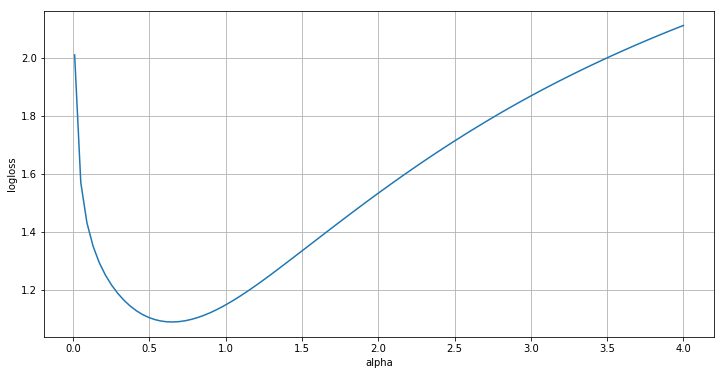

In [334]:
import matplotlib
from matplotlib import pyplot as plt

results1 = pd.DataFrame()
# collect alpha list
results1['alpha'] = gridsearch1.cv_results_['param_alpha'].data
# collect test scores
results1['neglogloss'] = gridsearch1.cv_results_['mean_test_score'].data
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(results1['alpha'], -results1['neglogloss'])
plt.xlabel('alpha')
plt.ylabel('logloss')
plt.grid()

In [336]:
# Re-do, but using *whole* training set to predict the test set

full_train_set = c_vectorizer.fit_transform(df_train['request_text_edit_aware'])
full_tags = df_train['requester_received_pizza']

# re-vectorize the test dataset since we have a new training set
test_set = c_vectorizer.transform(df_test['request_text_edit_aware'])

# To train the classifier
classifier = MultinomialNB() 
classifier.fit(full_train_set, full_tags) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [337]:
# Predict outcomes of the test dataset
# But we don't have outcomes so can't test accuracy as before
predict_test_data = classifier.predict(test_set)

In [338]:
# Award rate for train data
train_pizza_rate = sum(full_tags) / len(full_tags)
print('Of {} requests, {} pizzas were awarded, giving a {}% success rate'.format(len(full_tags), sum(full_tags), train_pizza_rate * 100))

Of 4040 requests, 994 pizzas were awarded, giving a 24.603960396039604% success rate


In [339]:
pizza_rate = sum(predict_test_data) / len(predict_test_data)
print('Of {} requests, {} pizzas were awarded, giving a {}% success rate'.format(len(predict_test_data), sum(predict_test_data), pizza_rate * 100))

Of 4040 requests, 490 pizzas were awarded, giving a 12.128712871287128% success rate


In [225]:
len(df_train)

4040

In [226]:
len(df_test)

4040

In [340]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression

ls = LogisticRegression()
ls.fit(train_set, train_tags)
predict_validation = ls.predict(valid_set)

print('Accuracy of Pizza estimate = {}'.format(
        accuracy_score(predict_validation, valid_tags) * 100)
     )
print(sum(predict_validation))

Accuracy of Pizza estimate = 70.04950495049505
113


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [274]:
# Grid search
#     Exhaustively iterate through params to find best values for model


lr = LogisticRegression()
# Iterate over 100 evenly spaced values of C from 0.005 to 0.1
parameters = {'C':np.linspace(0.005, 0.5, 100)}
gs = GridSearchCV(lr, parameters)
gs.fit(train_set, train_tags)

gs_predict = gs.predict(valid_set)

print(gs.best_params_)
print('Accuracy of Pizza estimate = {}'.format(
        accuracy_score(gs_predict, valid_tags) * 100)
     )

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'C': 0.015}
Accuracy of Pizza estimate = 75.4950495049505


In [286]:
# Apply gridsearch on full training data
lr = LogisticRegression()
# Iterate over 100 evenly spaced values of C from 0.005 to 0.7
parameters = {'C':np.linspace(0.005, 0.7, 100)}
gs2 = GridSearchCV(lr, parameters)
gs2.fit(full_train_set, full_tags)
# Predict test data
gs_test_predictions = gs2.predict(test_set)
print(gs.best_params_)
print(sum(gs_test_predictions))

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'C': 0.015}
41


In [264]:
# Award rate for train data
train_pizza_rate = sum(full_tags) / len(full_tags)
print('Of {} requests, {} pizzas were awarded, giving a {}% success rate'.format(len(full_tags), sum(full_tags), train_pizza_rate * 100))

Of 4040 requests, 994 pizzas were awarded, giving a 24.603960396039604% success rate


In [287]:
# Award rate for predicted test data
pizza_rate = sum(gs_test_predictions) / len(gs_test_predictions)
print('Of {} requests, {} pizzas were awarded, giving a {}% success rate'.format(len(gs_test_predictions), sum(gs_test_predictions), pizza_rate * 100))

Of 4040 requests, 41 pizzas were awarded, giving a 1.0148514851485149% success rate


In [358]:
# Suport vector machine method
from sklearn import svm
# SVM will loook at the extremes of the dataset and draw a decision boundary (hyperplane) near the extreme points in the dataset
# Frontier that best segregates the two options: in this case, True or False
# Only 'support vectors' are important for SVM - those extreme data points that are closest to the opposing class
# Want to look at extreme points and set margins based on these support vactors
# If D+ = distance from hyperplane to closest False value, and D- = opposite,
# Margin (around hyperplane = (D+ + D-))
# This is LINEAR SVM
# If the data is mltidimensional, it first needs to be converted to x-dimensional space
# Popular kernel types for transforming into higher-dimensional space: Polynomial, Radial Basis Function, Sigmoid
# Then you need to tune kernel params to get good results from the classifier

cl_svm = svm.SVC(gamma='scale', kernel='rbf')
cl_svm.fit(train_set, train_tags)

svm_predictions = cl_svm.predict(valid_set)

print('Accuracy of Pizza estimate = {}'.format(
        accuracy_score(svm_predictions, valid_tags) * 100)
     )

Accuracy of Pizza estimate = 76.11386138613861


In [370]:
from sklearn.tree import DecisionTreeClassifier

cl_d_tree = DecisionTreeClassifier(random_state=0)

cl_d_tree.fit(train_set, train_tags)

decisiontree_predictions = cl_d_tree.predict(valid_set)

print('Accuracy of Pizza estimate = {}'.format(
        accuracy_score(decisiontree_predictions, valid_tags) * 100)
     )

Accuracy of Pizza estimate = 67.32673267326733


In [377]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
forest_model.fit(train_set, train_tags)

rfc_preds = forest_model.predict(valid_set)

print('Accuracy of Pizza estimate = {}'.format(
        accuracy_score(rfc_preds, valid_tags) * 100)
     )


Accuracy of Pizza estimate = 76.11386138613861


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(train_set, train_tags, verbose=False)

xgb_preds = xgb.predict(valid_set)

print('Accuracy of Pizza estimate = {}'.format(
        accuracy_score(xgb_preds, valid_tags) * 100)
     )